In [1]:
import cv2
import PIL
import numpy as np
import random
import matplotlib.pyplot as plt
from math import nan
import pandas as pd

import math
import random as rd
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('E:\ACADS STUFF\Semester 6\prml\Assignment1\cm_dataset_2 - cm_dataset - Copy.csv')
data.head()

,X,Y
0,-1.2061,-2.52680
1,-3.7038,0.33831
2,4.3444,0.96302
3,3.3614,2.94250
4,4.1175,2.15120


In [4]:
#data = pd.read_csv('E:\ACADS STUFF\Semester 6\prml\Assignment1\Dataset.csv')
data.head()

,X,Y
0,-1.2061,-2.52680
1,-3.7038,0.33831
2,4.3444,0.96302
3,3.3614,2.94250
4,4.1175,2.15120


In [5]:
k = 2
#Centroids = (data.sample(n=k))

In [6]:
#Centroids

In [7]:
'''
plt.scatter(data["X"],data["Y"],c='black')
plt.scatter(Centroids["X"],Centroids["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
'''

'\nplt.scatter(data["X"],data["Y"],c=\'black\')\nplt.scatter(Centroids["X"],Centroids["Y"],c=\'red\')\nplt.xlabel(\'X\')\nplt.ylabel(\'Y\')\nplt.show()\n'

In [8]:
'''
center_list = []
for index1,row_c in Centroids.iterrows():
    center_list.append([row_c["X"],row_c["Y"]])
    '''

'\ncenter_list = []\nfor index1,row_c in Centroids.iterrows():\n    center_list.append([row_c["X"],row_c["Y"]])\n    '

In [9]:
data_list = []
for index1,row_c in data.iterrows():
    data_list.append([row_c["X"],row_c["Y"]])


In [10]:
def euclidian_distance(a,b):
    s= 0 
    for i in range(len(a)):
        s= s + (a[i] - b[i])**2
    
    return math.sqrt(s)
    

In [11]:
def distance_array(center_list,data_list):
    distance_list=[[] for i in range(len(center_list))]
    for i in range(len(center_list)):
        for j in range(len(data_list)):
            d = euclidian_distance(data_list[j],center_list[i])
            distance_list[i].append(d)
    return distance_list

In [12]:
def random_initialise(data_list,k):
    clusters = [[] for i in range(k)]
    
    for i in range(0,len(data_list)):
        r = random.randint(0,k-1)
        clusters[r].append(data_list[i])
    return clusters


In [13]:
def random_initialise(data_list,k):
    concatenated_array = np.vstack(data_list)
    min_x = np.min(concatenated_array[:,0])
    min_y = np.min(concatenated_array[:, 1])
    max_x = np.max(concatenated_array[:,0])
    max_y = np.max(concatenated_array[:, 1])
    mean_list_x = np.random.uniform(low=min_x,high=max_x,size = k)  
    mean_list_y = np.random.uniform(low=min_y,high=max_y,size = k)   
    mean_list = np.column_stack((mean_list_x,mean_list_y)) 
    cluster = [[] for i in range(k)]
    for i in range(len(data_list)):
        d_min = float("inf")
        for j in range(k):    
            d0 = euclidian_distance(data_list[i],mean_list[j])
            
            if d0<d_min:
                d_min = d0
                best_category = j
        cluster[best_category].append(data_list[i])

    return cluster


In [14]:
def mean_clusters(clusters,k):
    mean_list = []
    for i in range(k):
        mean_list.append(np.mean(np.array(clusters[i]),axis = 0))
   
    return mean_list

In [15]:
def reassign(clusters,k,data_list):
    mean_list = mean_clusters(clusters,k)
    distance_list = distance_array(mean_list,data_list)
    new_clutser = [[] for i in range(k)]
    cluster_nos = [-1 for i in range(len(data_list))]
    for i in range(len(data_list)):
        x,y = data_list[i]
        for p  in range(len(clusters[0])):
            if x== clusters[0][p][0] and y == clusters[0][p][1] :
                cluster_nos[i] = 0
        for p  in range(len(clusters[1])):
            if x== clusters[1][p][0] and y == clusters[1][p][1] :
                cluster_nos[i] = 1
    for i in range(len(data_list)):
        best_category = cluster_nos[i]
        d_min = float("inf")
        for index in range(k):
            d = distance_list[index][i]
            
            if d < d_min:
                d_min = d
                best_category = index
            elif d == d_min:
                best_category = cluster_nos[i]


      
        new_clutser[best_category].append(data_list[i])

    return new_clutser




5 different random intitalisations 

In [16]:
k=2

C:\Users\aniru\AppData\Local\Temp\ipykernel_24388\2912540036.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err1 = np.sum(np.linalg.norm(arr-new_mean[0]) for arr in new_cluster[0])
C:\Users\aniru\AppData\Local\Temp\ipykernel_24388\2912540036.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err2 = np.sum(np.linalg.norm(arr-new_mean[1]) for arr in new_cluster[1])


hi


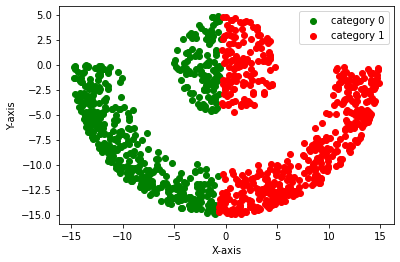

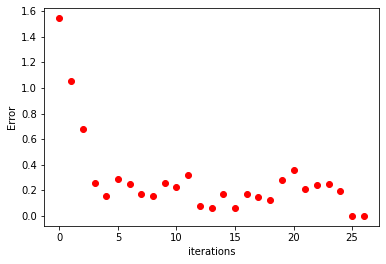

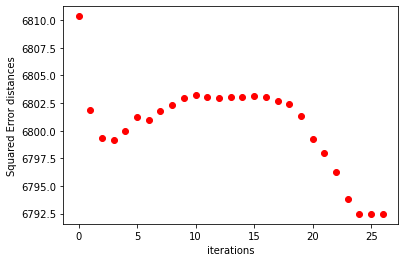

hi


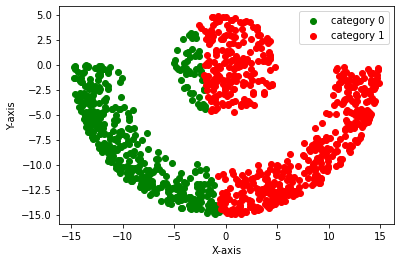

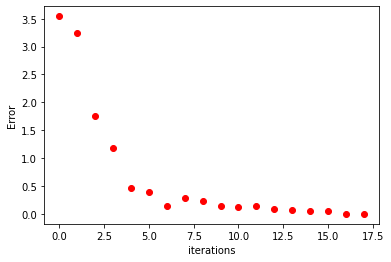

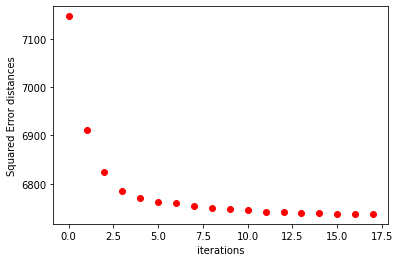

hi


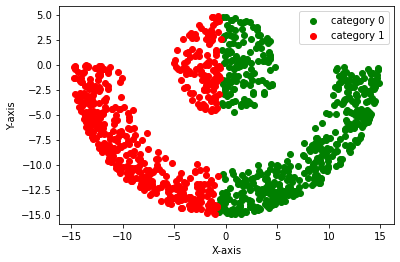

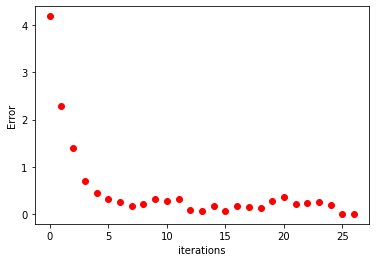

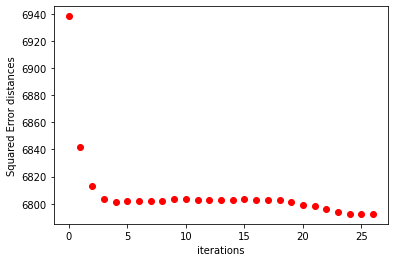

hi


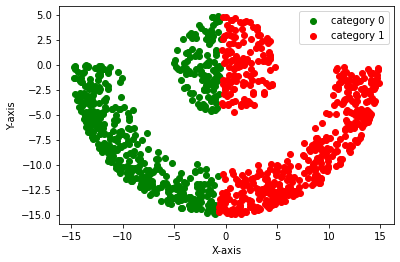

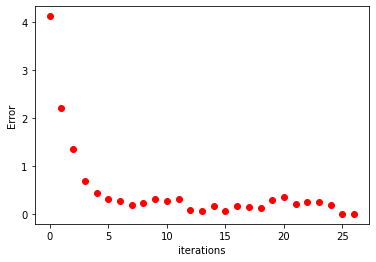

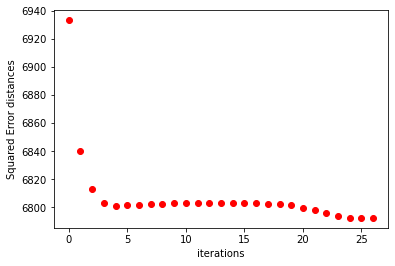

hi


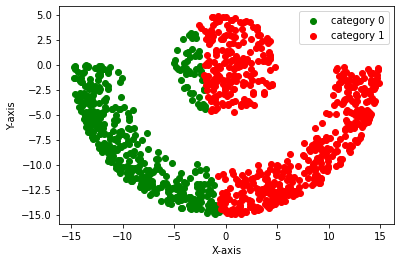

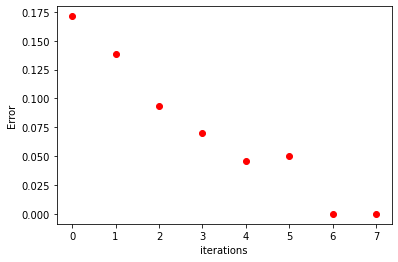

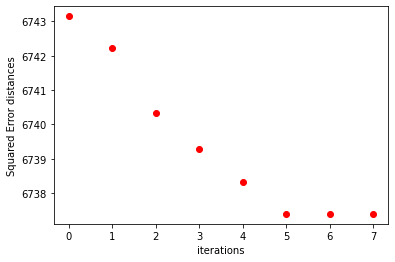

In [17]:
for i in range(5):
    convergence_number  = 0
    error = []
    cluster = []
    cluster = random_initialise(data_list,k)
    new_cluster = []
    new_mean = []
    old_mean = []
    
    err = 0
    errf= 0
    errff=[]
    #mean_clusters(cluster,k)
    while (True):
        new_cluster = reassign(cluster,k,data_list)
        new_mean = mean_clusters(new_cluster,k)
        old_mean =  mean_clusters(cluster,k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        err1 = np.sum(np.linalg.norm(arr-new_mean[0]) for arr in new_cluster[0]) 
        err2 = np.sum(np.linalg.norm(arr-new_mean[1]) for arr in new_cluster[1]) 
        errf = err1+err2
        error.append(err)
        errff.append(errf)
        if new_cluster == cluster :
            convergence_number +=1
        cluster = new_cluster
        if convergence_number >=2:
            break

    c1=0
    c=0
    for i, da in enumerate(cluster[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            print("hi")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
    for i, da in enumerate(cluster[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    for i in range(len(error)):
        plt.scatter(i,error[i],c="red")
    plt.xlabel("iterations")
    plt.ylabel("Error")
    plt.show()
    for i in range(len(errff)):
        plt.scatter(i,errff[i],c="red")
    plt.xlabel("iterations")
    plt.ylabel("Squared Error distances")
    plt.show()


2 - b, for one random initialisation, perform clustering for k =2,3,4 and show the results.

k = 2

In [18]:
def plot_perpendicular_bisector(p1, p2):
    mid_point = (p1 + p2) / 2.0
    direction_vector = p2 - p1
    perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])

   
    perpendicular_vector /= np.linalg.norm(perpendicular_vector)

    extended_line = [mid_point - 11 * perpendicular_vector, mid_point + 11 * perpendicular_vector]

    plt.plot([extended_line[0][0], extended_line[1][0]], [extended_line[0][1], extended_line[1][1]], color='black',label = "voronoi line")


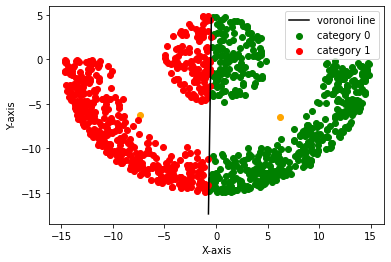

In [19]:
convergence_number  = 0
error = []
cluster = []
cluster = random_initialise(data_list,k)
new_cluster = []
new_mean = []
old_mean = []
err = 0

#mean_clusters(cluster,k)
while (True):
    new_cluster = reassign(cluster,k,data_list)
    new_mean = mean_clusters(new_cluster,k)
    old_mean =  mean_clusters(cluster,k)
    err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
    error.append(err)
    if new_cluster == cluster :
        convergence_number +=1
    cluster = new_cluster
    if convergence_number >=2:
        break

c1=0
c=0
plot_perpendicular_bisector(new_mean[0], new_mean[1])


plt.scatter(np.array(new_mean)[:, 0], np.array(new_mean)[:, 1], c='orange')
for i, da in enumerate(cluster[0]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
        if c == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

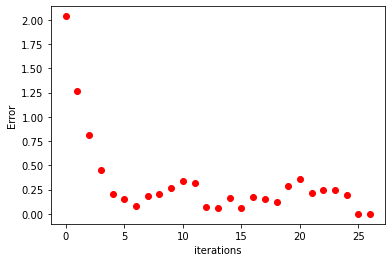

In [20]:
for i in range(len(error)):
    plt.scatter(i,error[i],c="red")
plt.xlabel("iterations")
plt.ylabel("Error")
plt.show()


 k = 3

In [21]:
k = 3

In [22]:


convergence_number = 0
error = []
cluster = random_initialise(data_list, k)
error = []
cluster = []
cluster = random_initialise(data_list, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0

while True:
  
        new_cluster = reassign(cluster, k, data_list)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        
        if new_cluster == cluster:
            convergence_number += 1
        
        cluster = new_cluster
        
        if convergence_number >= 2:
            break

In [23]:
def plot_perpendicular_bisector_modify(p1, p2):
    mid_point = (p1 + p2) / 2.0
    direction_vector = p2 - p1
    perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])

   
    perpendicular_vector /= np.linalg.norm(perpendicular_vector)

    extended_line = [mid_point - 10 * perpendicular_vector, mid_point + 10 * perpendicular_vector]
    return extended_line
   


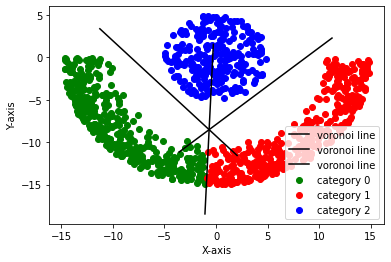

In [24]:
c1=0
c=0
c2= 0 
bisectors = []
for i in range(len(new_mean)):
    for j in range(i + 1, len(new_mean)):
        bisector = plot_perpendicular_bisector_modify(new_mean[i], new_mean[j])
        bisectors.append(bisector)
        plt.plot([bisector[0][0], bisector[1][0]], [bisector[0][1], bisector[1][1]], color='black',label = "voronoi line")

for i, da in enumerate(cluster[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red")
for i,da in enumerate(cluster[2]) :
    if c2 ==0:
         plt.scatter(da[0], da[1], c="blue",label = "category 2")
         c2+=1
    else:    
        plt.scatter(da[0], da[1], c="blue") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

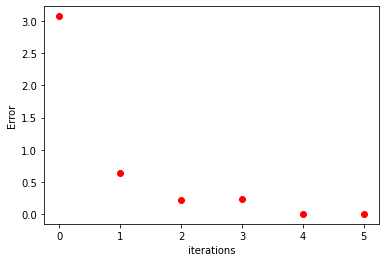

In [25]:
for i in range(len(error)):
    plt.scatter(i,error[i],c="red")
plt.xlabel("iterations")
plt.ylabel("Error")
plt.show()


k = 4

In [26]:
k = 4


In [27]:
import numpy as np

# Assuming the functions random_initialise, reassign, and mean_clusters are defined

convergence_number = 0
error = []
cluster = random_initialise(data_list, k)
error = []
cluster = []
cluster = random_initialise(data_list, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0

while True:
    
        new_cluster = reassign(cluster, k, data_list)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        
        if new_cluster == cluster:
            convergence_number += 1
        
        cluster = new_cluster
        
        if convergence_number >= 2:
            break


In [28]:
new_mean

[array([  0.55360879, -12.8139692 ]),
 array([11.37061362, -5.78862737]),
 array([-0.1116423 , -0.09395197]),
 array([-11.13403102,  -6.37970265])]

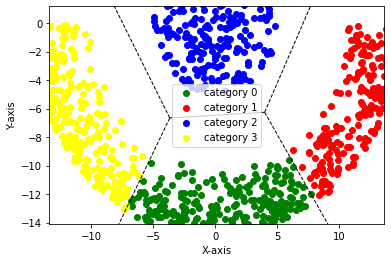

In [29]:
c1=0
c=0
c2= 0 
c3= 0 
c4 = 0
vor = Voronoi(new_mean)
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
for i, da in enumerate(cluster[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red")
for i,da in enumerate(cluster[2]) :
    if c2 ==0:
         plt.scatter(da[0], da[1], c="blue",label = "category 2")
         c2+=1
    else:    
        plt.scatter(da[0], da[1], c="blue")
for i,da in enumerate(cluster[3]) :
    if c3 ==0:
         plt.scatter(da[0], da[1], c="yellow",label = "category 3")
         c3+=1
    else:    
        plt.scatter(da[0], da[1], c="yellow") 

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

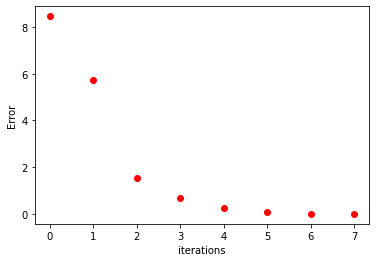

In [30]:
for i in range(len(error)):
    plt.scatter(i,error[i],c="red")
plt.xlabel("iterations")
plt.ylabel("Error")
plt.show()


k =5

In [31]:
k = 5

In [32]:
import numpy as np

# Assuming the functions random_initialise, reassign, and mean_clusters are defined

convergence_number = 0
error = []
cluster = random_initialise(data_list, k)
error = []
cluster = []
cluster = random_initialise(data_list, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0

while True:
        new_cluster = reassign(cluster, k, data_list)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        
        if new_cluster == cluster:
            convergence_number += 1
        
        cluster = new_cluster
        
        if convergence_number >= 2:
            break



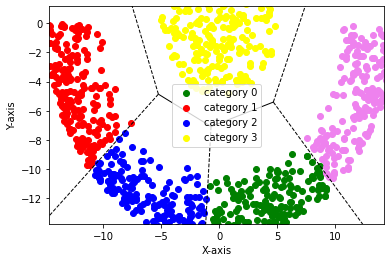

In [33]:
c1=0
c=0
c2= 0 
c3= 0 
c4 = 0
vor = Voronoi(new_mean)
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
for i, da in enumerate(cluster[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red")
for i,da in enumerate(cluster[2]) :
    if c2 ==0:
         plt.scatter(da[0], da[1], c="blue",label = "category 2")
         c2+=1
    else:    
        plt.scatter(da[0], da[1], c="blue")
for i,da in enumerate(cluster[3]) :
    if c3 ==0:
         plt.scatter(da[0], da[1], c="yellow",label = "category 3")
         c3+=1
    else:    
        plt.scatter(da[0], da[1], c="yellow") 
for i,da in enumerate(cluster[4]) :
    if c3 ==0:
         plt.scatter(da[0], da[1], c="viloet",label = "category 4")
         c3+=1
    else:    
        plt.scatter(da[0], da[1], c="violet") 

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

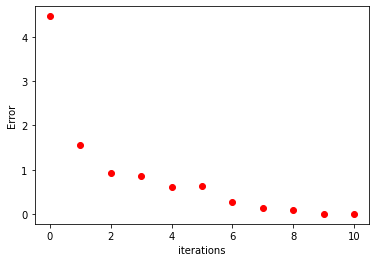

In [34]:
for i in range(len(error)):
    plt.scatter(i,error[i],c="red")
plt.xlabel("iterations")
plt.ylabel("Error")
plt.show()


2 c - Kernalise 

In [35]:
k = 2

In [36]:
def polynomial_kernel(X,p):
    
    kernel_matrix = [[0 for i in range(len(X))] for j in range(len(X))]
    kernel_matrix = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            kernel_matrix[i][j] = (1+X[i].T @ X[j])**p         
    return kernel_matrix


In [37]:
def exponential_kernel(X,sigma):
    n = len(X)
    kernel_matrix = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            kernel_matrix[i][j] = np.exp(-(euclidian_distance(X[i],X[j]))**2/(2*sigma*sigma))
            kernel_matrix[j][i] = kernel_matrix[i][j]
    return kernel_matrix


Polynomial kernel degree 2

In [39]:
kernel = polynomial_kernel(np.array(data_list),2)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))

In [40]:
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break


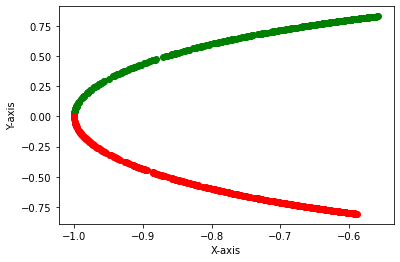

In [41]:
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [42]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
        

In [43]:
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

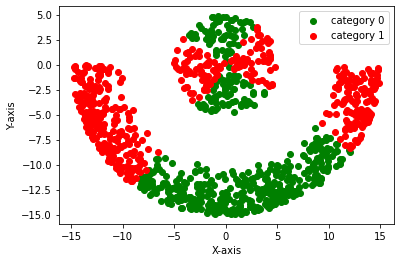

In [44]:
c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Polynomial degreee 3

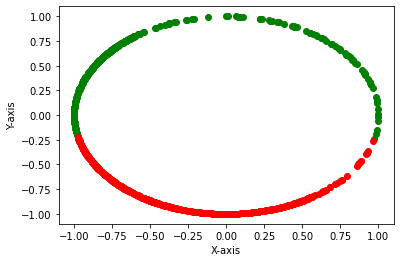

In [45]:
kernel = polynomial_kernel(np.array(data_list),3)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))

convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

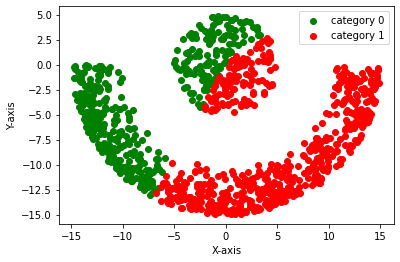

In [46]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
        
cluster_pca = [[],[]]
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Polynomial kernel degree 4

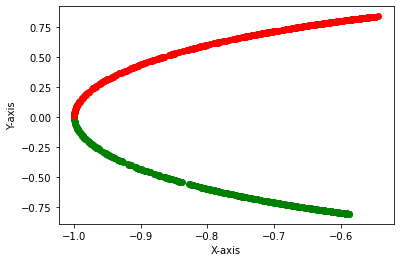

In [47]:
kernel = polynomial_kernel(np.array(data_list),4)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))

convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

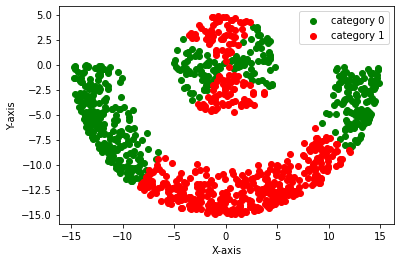

In [48]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
        
cluster_pca = [[],[]]
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 64

In [49]:
kernel = exponential_kernel(np.array(data_list),64)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))

In [50]:
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break


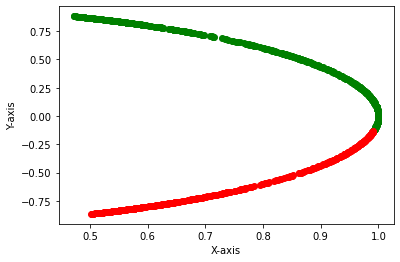

In [51]:
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [52]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
        

In [53]:
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

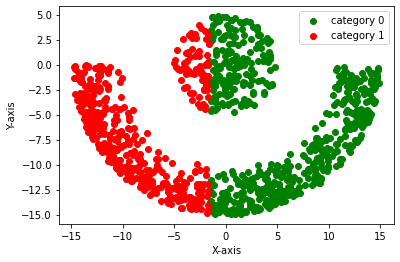

In [54]:
c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 10

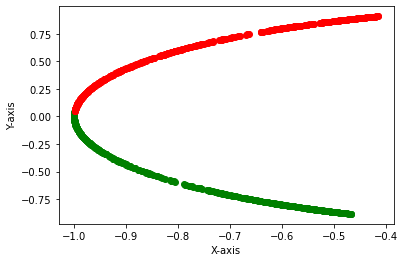

In [55]:
kernel = exponential_kernel(np.array(data_list),10)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

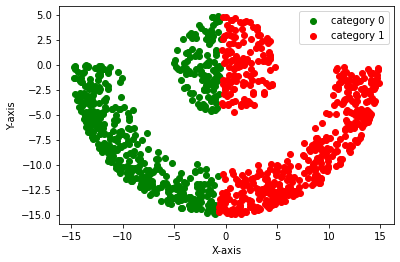

In [56]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 100

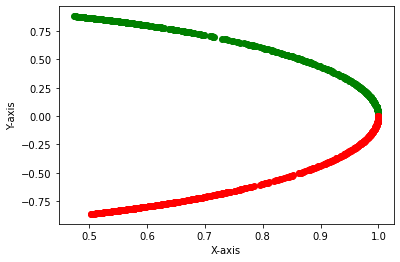

In [57]:
kernel = exponential_kernel(np.array(data_list),100)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

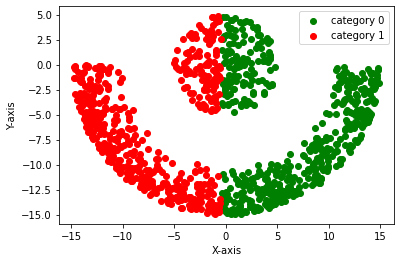

In [58]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 1

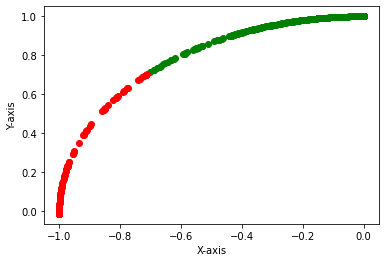

In [59]:
kernel = exponential_kernel(np.array(data_list),1)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
for i, da in enumerate(cluster[0]):
    plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster[1]):
    plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

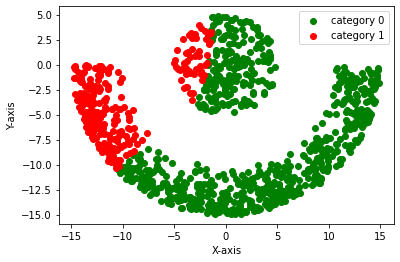

In [60]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 0.7

In [61]:
k=2

In [131]:
kernel = exponential_kernel(np.array(data_list),0.7)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
c1=0
c=0

    

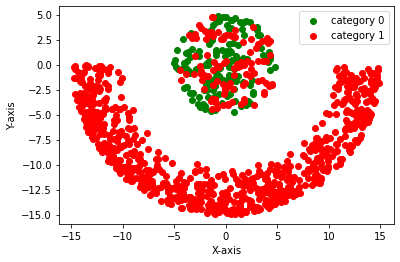

In [132]:
cluster_index = [-1 for i in range(len(data_list))]

for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

In [76]:
kernel = exponential_kernel(np.array(data_list),50)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]

normalized_matrix = np.array(eigenvectors_k).copy()
for i in range(0,len(normalized_matrix)):
    normalized_matrix[i] = normalized_matrix[i]/(np.linalg.norm(normalized_matrix[i]))
convergence_number = 0
error = []
cluster = []
cluster = random_initialise(normalized_matrix, k)
new_cluster = []
new_mean = []
old_mean = []
err = 0
while True:
        new_cluster = reassign(cluster, k, normalized_matrix)
        new_mean = mean_clusters(new_cluster, k)
        old_mean = mean_clusters(cluster, k)
        err = np.sum(np.abs(np.array(new_mean) - np.array(old_mean)))
        error.append(err)
        if all(new_cluster) == all(cluster):
            convergence_number += 1
        cluster = new_cluster
        if convergence_number >= 2:
            break
c1=0
c=0

    

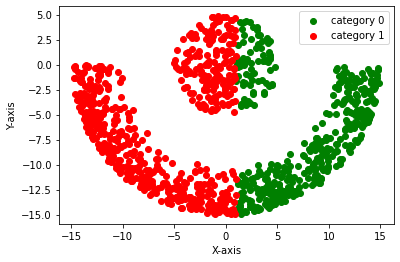

In [68]:
cluster_index = [-1 for i in range(len(data_list))]
for i in range(len(data_list)):
        x,y = normalized_matrix[i]
        for p  in range(len(cluster[0])):
            if x== cluster[0][p][0] and y == cluster[0][p][1] :
                cluster_index[i] = 0
        for q  in range(len(cluster[1])):
            if x== cluster[1][q][0] and y == cluster[1][q][1] :
                cluster_index[i] = 1
                
cluster_pca = [[],[]]
for i in range(len(data_list)):
    cluster_pca[cluster_index[i]].append(data_list[i])

c1=0
c=0
for i, da in enumerate(cluster_pca[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_pca[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()
    

part 4  Instead of using the method suggested by spectral clustering to map eigenvectors
 to cluster assignments, use the following method: Assign data point i to cluster

Exponential kernel variance 64

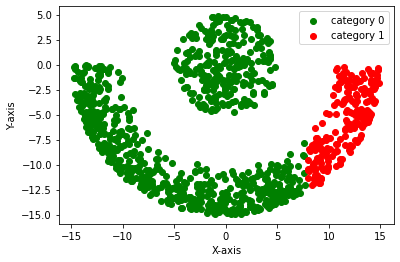

In [89]:
kernel = exponential_kernel(np.array(data_list),64)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
    

Exponential kernel variance 100


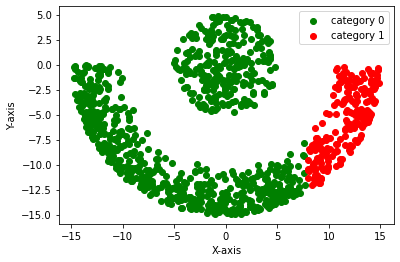

In [90]:
kernel = exponential_kernel(np.array(data_list),100)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Exponential kernel variance 10

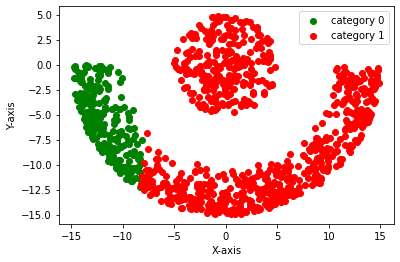

In [91]:
kernel = exponential_kernel(np.array(data_list),10)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Exponential kernel variance 1

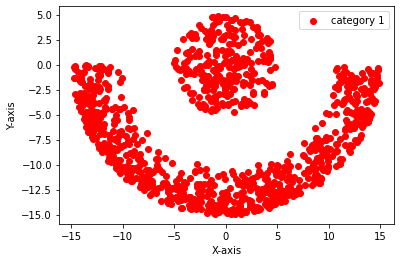

In [133]:
kernel = exponential_kernel(np.array(data_list),1)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Exponential kernel variance 0.7

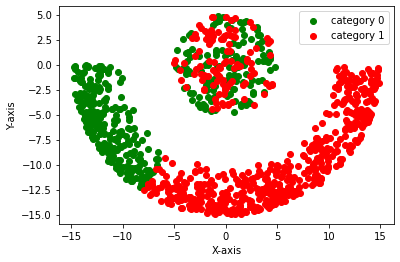

In [93]:
kernel = exponential_kernel(np.array(data_list),0.7)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

polynomial kernel degree 2


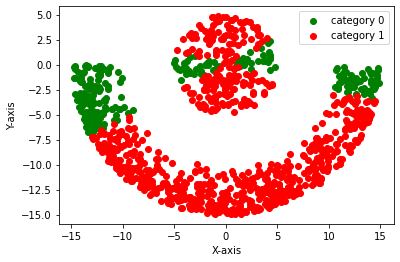

In [94]:
kernel = polynomial_kernel(np.array(data_list),2)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

polynomial kernel degree 3


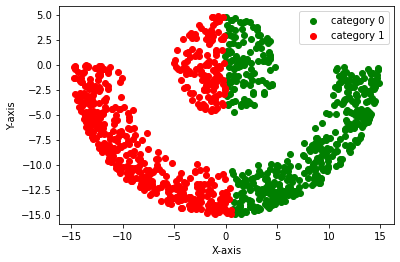

In [95]:
kernel = polynomial_kernel(np.array(data_list),3)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

polynomial kernel degree 4

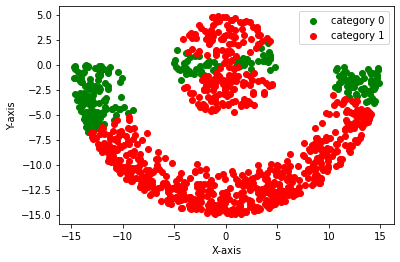

In [96]:
kernel = polynomial_kernel(np.array(data_list),4)

kernel_eigenvalues, kernel_eigenvectors = np.linalg.eigh(kernel)
order = kernel_eigenvalues.argsort()[::-1]
kernel_eigenvalues = kernel_eigenvalues[order]
kernel_eigenvectors = kernel_eigenvectors[:,order]
eigenvectors_k = kernel_eigenvectors[:,:k]
eigenvalues_k = kernel_eigenvalues[:k]
cluster_diff = [0 for i in range(len(data_list))]
cluster_diff_list = [[],[]]
for i in range(len(data_list)):
    if eigenvectors_k[i][0] > eigenvectors_k[i][1] :
        cluster_diff[i] = 0
        cluster_diff_list[0].append(data_list[i])
    else:
        cluster_diff[i] = 1
        cluster_diff_list[1].append(data_list[i])
c1=0
c=0
for i, da in enumerate(cluster_diff_list[0]):
        if c == 0:
            plt.scatter(da[0], da[1], c="green",label = "category 0")
            c+=1
        else:
            plt.scatter(da[0], da[1], c="green")
for i, da in enumerate(cluster_diff_list[1]):
        if c1 == 0:
            plt.scatter(da[0], da[1], c="red",label = "category 1")
            c1+=1
        else:
            plt.scatter(da[0], da[1], c="red") 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()